<a href="https://colab.research.google.com/github/amulyakamatagi/python-moments-of-business/blob/main/salary_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS PROBLEM:**
Predict the salary hike based on the experience

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv("Salary_Data.csv")
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
data.shape

(30, 2)

In [6]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [9]:
data[data.duplicated()].shape

(0, 2)

In [10]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# **INTERPRETATION:**
* from the above describe function , we can understand that 50% of the data in the years experience column lies in the range of 3 to 7 years
* while in the salary column , it lies in the range of 56,720 and 1,00,544
* the mean is greater than median indicating the data is slightly skewed making it a positively skewed data

# **NULL VALUES AND OUTLIERS**

<Axes: >

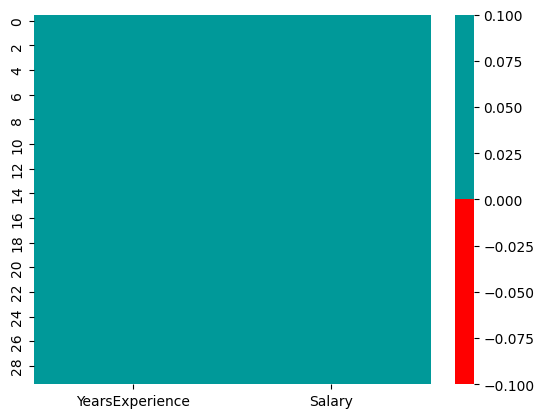

In [12]:
cols=data.columns
color=["#ff0000","#009999"]
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(color))

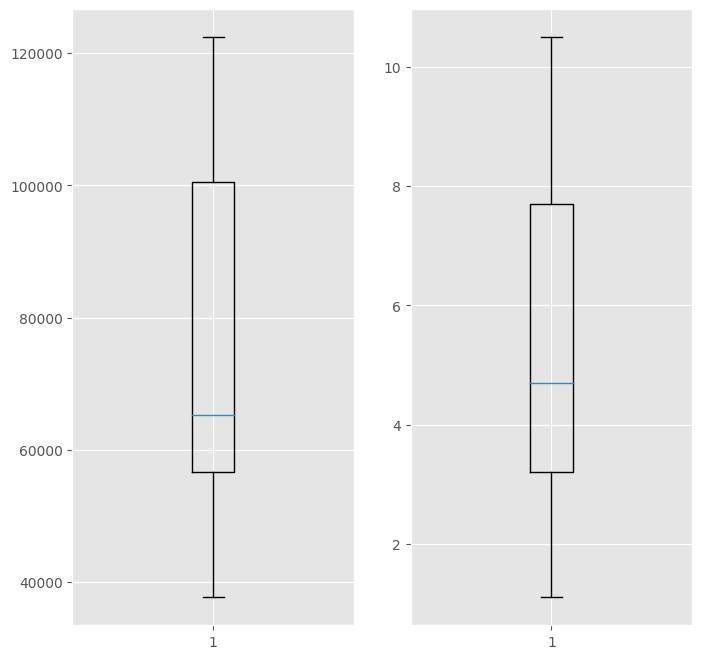

In [17]:
plt.style.use("ggplot")
plt.figure(figsize=(8,8))
plt.subplot(121)
plt.boxplot(data["Salary"])
plt.subplot(122)
plt.boxplot(data["YearsExperience"])
plt.show()

* From the heatmap , we can understand that , the data is free from all the null values
* there are no values which are lying above or below upper quartile region or lower quartile region , thus there are no outliers

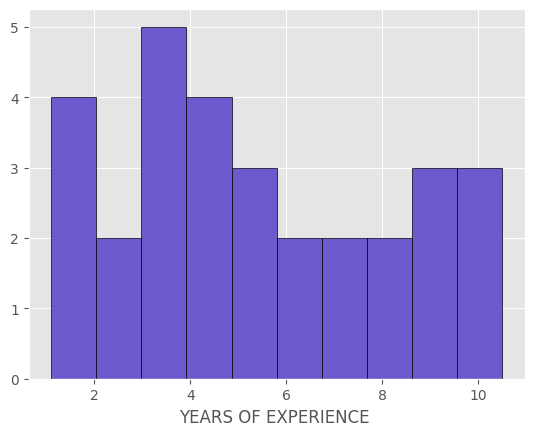

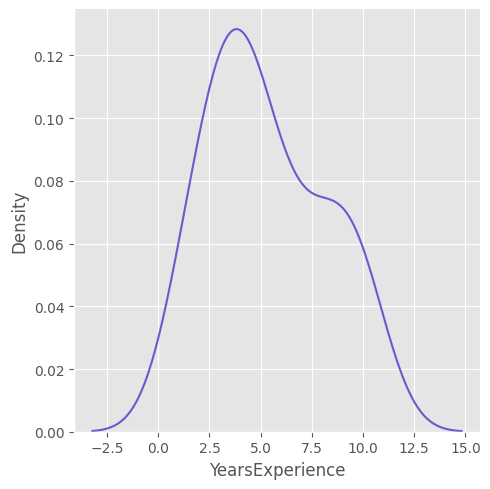

In [26]:
plt.hist(data["YearsExperience"],bins=10,color="slateblue",edgecolor="black")
plt.xlabel("YEARS OF EXPERIENCE ")
sns.displot(data,x="YearsExperience",kind="kde",color="slateblue")

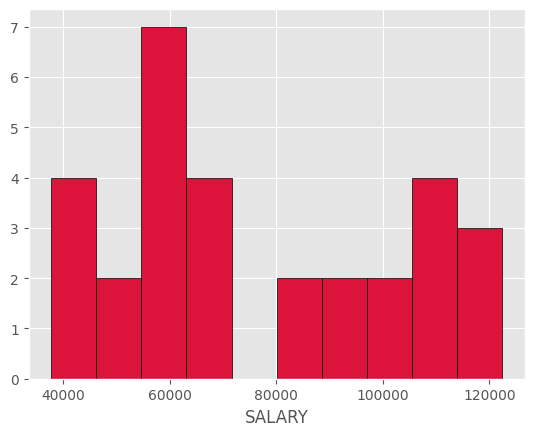

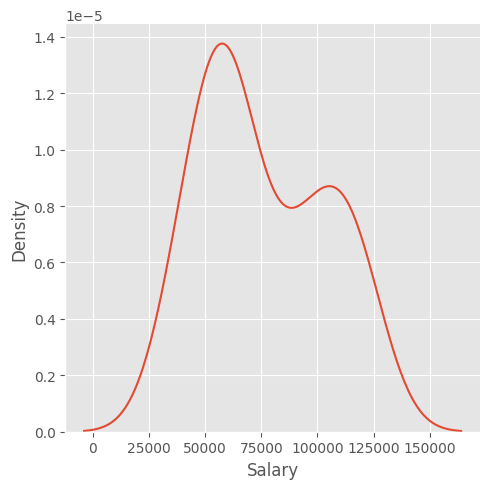

In [31]:
plt.hist(data["Salary"],bins=10,color="crimson",edgecolor="black")
plt.xlabel("SALARY")
sns.displot(data,x="Salary",kind="kde")

# **CORRELATION MATRIX**(understanding the relation between x and y)
* x(Predictor)=years of experience
*y(Target variable)=Salary

<Axes: >

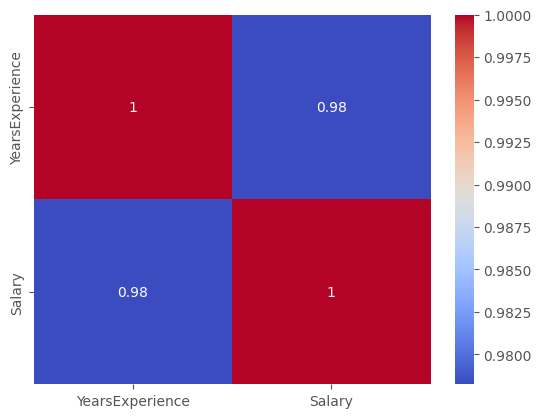

In [32]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

# **SCATTERPLOT**

Text(0, 0.5, 'Salary')

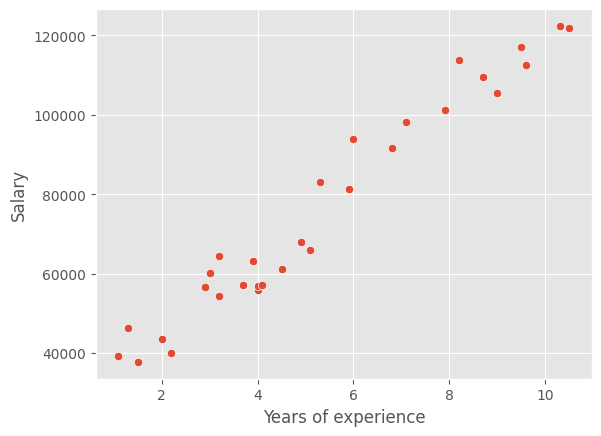

In [33]:
sns.scatterplot(x="YearsExperience",y='Salary',data=data)
plt.xlabel("Years of experience")
plt.ylabel("Salary")

# **INTERPRETATION:**
* As we can observe , the correlation between two variables is 0.98 which is a **very strong positive correlation**
* while the direction of scatterplot is **positive linear association**
* thus , if the years of experience increases , the salary also increases

# **REGRESSION PLOT**  ( the line of best fit )

<Axes: xlabel='YearsExperience', ylabel='Salary'>

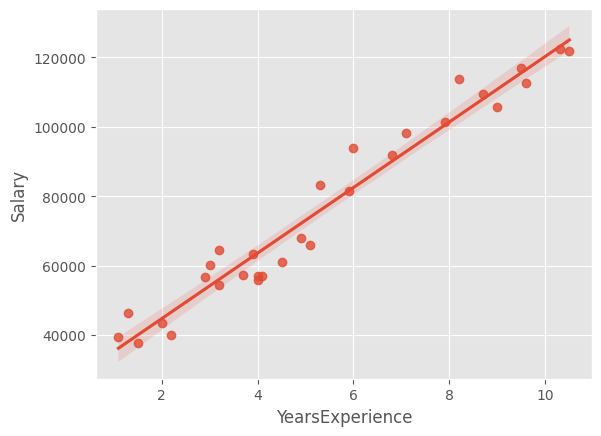

In [34]:
sns.regplot(x="YearsExperience",y='Salary',data=data)

# **BUILDING THE MODEL**

In [35]:
import statsmodels.formula.api as smf
model=smf.ols("Salary~YearsExperience",data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           1.14e-20
Time:                        04:35:20   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [37]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [38]:
model.rsquared

0.9569566641435086

In [40]:
pred=model.predict(pd.DataFrame(data["YearsExperience"]))
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [44]:
rmse=np.sqrt(np.mean((np.array(data["Salary"])-np.array(pred))**2))
rmse

5592.043608760662

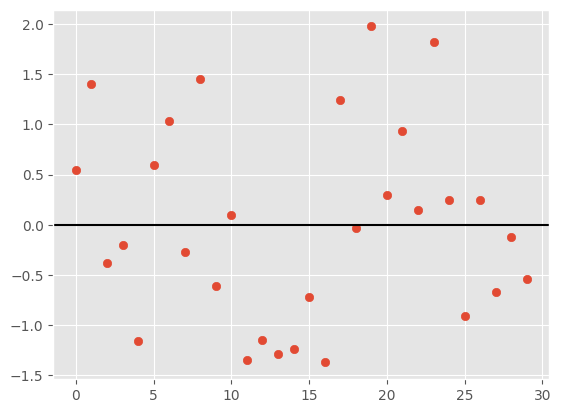

In [47]:
plt.scatter(np.arange(30),model.resid_pearson)
plt.axhline(y=0,color="black")

# **INTERPRETATION:**
* As we can see in the above model
* the R-squared and Adj_Rsquared are upto the mark i.e 0.95
* the βo=25792 and β1=9449
* In the above model validation technique , we can observe no pattern between residuals and the fitted values does not share any patters
* hence , there is no relation

# **PREDICTING THE SALARY**

In [60]:
salary_data=pd.DataFrame()
salary_data["YearsExperience"]=pd.Series(data["YearsExperience"])
salary_data["Salary"]=pd.Series(data["Salary"])
salary_data["predicted_salary"]=pd.Series(pred)

In [61]:
salary_data

,YearsExperience,Salary,predicted_salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788
